In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from anyio.streams import file

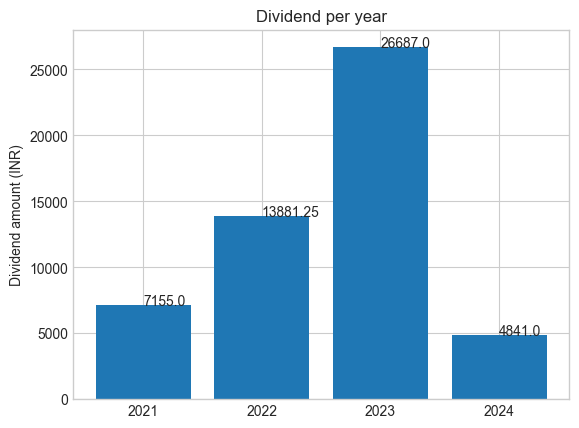

In [2]:
conn = None
cursor = None

#establishing the connection
conn = psycopg2.connect(
    database="mydatabase", user="postgres", password="password", host="localhost", port= 5432
)

cursor = conn.cursor()
cursor.execute("select * from wealthmanager.dividendmaster")
result = cursor.fetchall()
df = pd.DataFrame.from_records(result, columns=[x[0] for x in cursor.description])
df["year"] = df["dividendyear"].astype(str)
temp = df[['year','dividendamount']]
temp = temp.groupby("year").sum("dividendamount")

dividendByYear = temp['dividendamount'].to_dict()
plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots()
keys = list(dividendByYear.keys())
values = list(dividendByYear.values())
ax.bar(keys, values)
ax.set(title = "Dividend per year",
      ylabel= "Dividend amount (INR)")

#the for is for displying the number on top
for i in range(len(keys)):
        plt.text(i,values[i],values[i])

plt.show()
plt.close()

In [3]:
# see the different styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']